In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

In [2]:
pt = pd.read_csv('CBs.csv')
pt

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,...,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,21,2000,32.0,1087,1440,...,45.2,2,1.4,0.6,19,50,36,8,94,Matches
1,2,Che Adams,sct SCO,FW,Southampton,25,1996,22.7,337,484,...,56.6,3,2.6,0.4,26,22,13,1,35,Matches
2,3,Rayan Aït Nouri,fr FRA,DF,Wolves,20,2001,20.3,754,1003,...,43.7,2,1.3,0.7,17,29,15,9,49,Matches
3,4,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,22.2,629,873,...,48.4,3,1.4,1.6,6,48,10,1,75,Matches
4,5,Nathan Aké,nl NED,DF,Manchester City,26,1995,10.3,780,855,...,81.6,0,0.5,-0.5,2,53,3,0,31,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,Andros Townsend,eng ENG,MF,Everton,30,1991,16.2,342,487,...,38.5,2,2.4,-0.4,30,18,28,13,46,Matches
495,496,Adama Traoré,es ESP,FW,Wolves,25,1996,11.9,245,329,...,75.6,0,1.7,-1.7,19,17,15,7,23,Matches
496,497,Bertrand Traoré,bf BFA,"MF,FW",Aston Villa,25,1995,2.4,62,83,...,70.0,0,0.0,0.0,0,5,4,0,10,Matches
497,498,Trézéguet,eg EGY,FW,Aston Villa,26,1994,0.1,6,6,...,100.0,0,0.0,0.0,0,2,1,0,1,Matches


In [3]:
clr = pd.read_csv('Clr.csv')
pt['Clr'] = clr['Clr']

In [4]:
cr = pd.read_csv('cary.csv')
pt['PrgDist.1'] = cr['PrgDist']

In [5]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rk         499 non-null    int64  
 1   Player     499 non-null    object 
 2   Nation     499 non-null    object 
 3   Pos        499 non-null    object 
 4   Squad      499 non-null    object 
 5   Age        499 non-null    int64  
 6   Born       499 non-null    int64  
 7   90s        499 non-null    float64
 8   Cmp        499 non-null    int64  
 9   Att        499 non-null    int64  
 10  Cmp%       497 non-null    float64
 11  TotDist    499 non-null    int64  
 12  PrgDist    499 non-null    int64  
 13  Cmp.1      499 non-null    int64  
 14  Att.1      499 non-null    int64  
 15  Cmp%.1     489 non-null    float64
 16  Cmp.2      499 non-null    int64  
 17  Att.2      499 non-null    int64  
 18  Cmp%.2     486 non-null    float64
 19  Cmp.3      499 non-null    int64  
 20  Att.3     

In [6]:

pt['Rk'] =  pt['Rk'].astype(float)
pt['PrgDist'] =  pt['PrgDist'].astype(float)
pt['KP'] =  pt['KP'].astype(float)
pt['1/3'] =  pt['1/3'].astype(float)
pt['PPA'] =  pt['PPA'].astype(float)
pt['CrsPA'] =  pt['CrsPA'].astype(float)
pt['Prog'] =  pt['Prog'].astype(float)
pt['PrgDist.1'] =  pt['PrgDist.1'].astype(float)
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rk         499 non-null    float64
 1   Player     499 non-null    object 
 2   Nation     499 non-null    object 
 3   Pos        499 non-null    object 
 4   Squad      499 non-null    object 
 5   Age        499 non-null    int64  
 6   Born       499 non-null    int64  
 7   90s        499 non-null    float64
 8   Cmp        499 non-null    int64  
 9   Att        499 non-null    int64  
 10  Cmp%       497 non-null    float64
 11  TotDist    499 non-null    int64  
 12  PrgDist    499 non-null    float64
 13  Cmp.1      499 non-null    int64  
 14  Att.1      499 non-null    int64  
 15  Cmp%.1     489 non-null    float64
 16  Cmp.2      499 non-null    int64  
 17  Att.2      499 non-null    int64  
 18  Cmp%.2     486 non-null    float64
 19  Cmp.3      499 non-null    int64  
 20  Att.3     

In [7]:
to_drop = ['Nation','Age' , 'Born' , 'Matches' , 'Ast' , 'xA' , 'A-xA' , 'Rk' ]
pt.drop(to_drop, inplace=True, axis=1)

In [8]:
pt.head()

,Player,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,...,Cmp.3,Att.3,Cmp%.3,KP,1/3,PPA,CrsPA,Prog,Clr,PrgDist.1
0,Max Aarons,DF,Norwich City,32.0,1087,1440,75.5,18371,6874.0,560,...,98,217,45.2,19.0,50.0,36.0,8.0,94.0,70,3893.0
1,Che Adams,FW,Southampton,22.7,337,484,69.6,5275,1087.0,187,...,30,53,56.6,26.0,22.0,13.0,1.0,35.0,15,833.0
2,Rayan Aït Nouri,DF,Wolves,20.3,754,1003,75.2,13088,4592.0,385,...,76,174,43.7,17.0,29.0,15.0,9.0,49.0,32,2300.0
3,Kristoffer Ajer,DF,Brentford,22.2,629,873,72.1,11601,5267.0,245,...,74,153,48.4,6.0,48.0,10.0,1.0,75.0,81,2047.0
4,Nathan Aké,DF,Manchester City,10.3,780,855,91.2,14444,4178.0,331,...,80,98,81.6,2.0,53.0,3.0,0.0,31.0,31,2226.0


In [9]:
filt = (pt['Pos'] == 'DF')
pt[filt]

,Player,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,...,Cmp.3,Att.3,Cmp%.3,KP,1/3,PPA,CrsPA,Prog,Clr,PrgDist.1
0,Max Aarons,DF,Norwich City,32.0,1087,1440,75.5,18371,6874.0,560,...,98,217,45.2,19.0,50.0,36.0,8.0,94.0,70,3893.0
2,Rayan Aït Nouri,DF,Wolves,20.3,754,1003,75.2,13088,4592.0,385,...,76,174,43.7,17.0,29.0,15.0,9.0,49.0,32,2300.0
3,Kristoffer Ajer,DF,Brentford,22.2,629,873,72.1,11601,5267.0,245,...,74,153,48.4,6.0,48.0,10.0,1.0,75.0,81,2047.0
4,Nathan Aké,DF,Manchester City,10.3,780,855,91.2,14444,4178.0,331,...,80,98,81.6,2.0,53.0,3.0,0.0,31.0,31,2226.0
7,Trent Alexander-Arnold,DF,Liverpool,31.7,2013,2706,74.4,44509,18154.0,727,...,451,786,57.4,89.0,231.0,89.0,26.0,278.0,43,3315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Luke Thomas,DF,Leicester City,21.2,1008,1256,80.3,16099,5883.0,507,...,53,127,41.7,11.0,66.0,14.0,2.0,73.0,48,1771.0
486,Dominic Thompson,DF,Brentford,1.6,21,41,51.2,338,92.0,10,...,2,13,15.4,0.0,0.0,0.0,0.0,1.0,4,42.0
488,Kieran Tierney,DF,Arsenal,21.3,904,1164,77.7,17193,5517.0,352,...,92,199,46.2,22.0,73.0,25.0,16.0,76.0,46,2638.0
489,Takehiro Tomiyasu,DF,Arsenal,18.7,883,1085,81.4,15671,5400.0,404,...,89,138,64.5,12.0,74.0,17.0,13.0,55.0,48,1848.0


In [10]:
pt = pt.drop(index=pt[pt['Pos'] == 'FW'].index)
pt

,Player,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,...,Cmp.3,Att.3,Cmp%.3,KP,1/3,PPA,CrsPA,Prog,Clr,PrgDist.1
0,Max Aarons,DF,Norwich City,32.0,1087,1440,75.5,18371,6874.0,560,...,98,217,45.2,19.0,50.0,36.0,8.0,94.0,70,3893.0
2,Rayan Aït Nouri,DF,Wolves,20.3,754,1003,75.2,13088,4592.0,385,...,76,174,43.7,17.0,29.0,15.0,9.0,49.0,32,2300.0
3,Kristoffer Ajer,DF,Brentford,22.2,629,873,72.1,11601,5267.0,245,...,74,153,48.4,6.0,48.0,10.0,1.0,75.0,81,2047.0
4,Nathan Aké,DF,Manchester City,10.3,780,855,91.2,14444,4178.0,331,...,80,98,81.6,2.0,53.0,3.0,0.0,31.0,31,2226.0
5,Marc Albrighton,"FW,DF",Leicester City,12.6,345,551,62.6,5530,2373.0,200,...,24,106,22.6,12.0,21.0,11.0,5.0,32.0,10,810.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Takehiro Tomiyasu,DF,Arsenal,18.7,883,1085,81.4,15671,5400.0,404,...,89,138,64.5,12.0,74.0,17.0,13.0,55.0,48,1848.0
490,James Tomkins,DF,Crystal Palace,6.1,276,314,87.9,6692,1750.0,46,...,62,82,75.6,2.0,5.0,0.0,0.0,9.0,14,383.0
494,Andros Townsend,MF,Everton,16.2,342,487,70.2,5948,2075.0,162,...,37,96,38.5,30.0,18.0,28.0,13.0,46.0,6,1483.0
496,Bertrand Traoré,"MF,FW",Aston Villa,2.4,62,83,74.7,1115,254.0,30,...,7,10,70.0,0.0,5.0,4.0,0.0,10.0,1,276.0


In [11]:
pt = pt.drop(index=pt[pt['Pos'] == 'MF'].index)
pt = pt.drop(index=pt[pt['Pos'] == 'FW,DF'].index)
pt = pt.drop(index=pt[pt['Pos'] == 'FW,MF'].index)
pt = pt.drop(index=pt[pt['Pos'] == 'DF,MF'].index)
pt = pt.drop(index=pt[pt['Pos'] == 'DF,MF'].index)
pt = pt.drop(index=pt[pt['Pos'] == 'MF,FW'].index)
pt = pt.drop(index=pt[pt['Pos'] == 'MF,DF'].index)
pt

,Player,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,...,Cmp.3,Att.3,Cmp%.3,KP,1/3,PPA,CrsPA,Prog,Clr,PrgDist.1
0,Max Aarons,DF,Norwich City,32.0,1087,1440,75.5,18371,6874.0,560,...,98,217,45.2,19.0,50.0,36.0,8.0,94.0,70,3893.0
2,Rayan Aït Nouri,DF,Wolves,20.3,754,1003,75.2,13088,4592.0,385,...,76,174,43.7,17.0,29.0,15.0,9.0,49.0,32,2300.0
3,Kristoffer Ajer,DF,Brentford,22.2,629,873,72.1,11601,5267.0,245,...,74,153,48.4,6.0,48.0,10.0,1.0,75.0,81,2047.0
4,Nathan Aké,DF,Manchester City,10.3,780,855,91.2,14444,4178.0,331,...,80,98,81.6,2.0,53.0,3.0,0.0,31.0,31,2226.0
7,Trent Alexander-Arnold,DF,Liverpool,31.7,2013,2706,74.4,44509,18154.0,727,...,451,786,57.4,89.0,231.0,89.0,26.0,278.0,43,3315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Luke Thomas,DF,Leicester City,21.2,1008,1256,80.3,16099,5883.0,507,...,53,127,41.7,11.0,66.0,14.0,2.0,73.0,48,1771.0
486,Dominic Thompson,DF,Brentford,1.6,21,41,51.2,338,92.0,10,...,2,13,15.4,0.0,0.0,0.0,0.0,1.0,4,42.0
488,Kieran Tierney,DF,Arsenal,21.3,904,1164,77.7,17193,5517.0,352,...,92,199,46.2,22.0,73.0,25.0,16.0,76.0,46,2638.0
489,Takehiro Tomiyasu,DF,Arsenal,18.7,883,1085,81.4,15671,5400.0,404,...,89,138,64.5,12.0,74.0,17.0,13.0,55.0,48,1848.0


In [12]:
pt = pt.drop(index=pt[pt['Pos'] == 'GK'].index)
pt

,Player,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,...,Cmp.3,Att.3,Cmp%.3,KP,1/3,PPA,CrsPA,Prog,Clr,PrgDist.1
0,Max Aarons,DF,Norwich City,32.0,1087,1440,75.5,18371,6874.0,560,...,98,217,45.2,19.0,50.0,36.0,8.0,94.0,70,3893.0
2,Rayan Aït Nouri,DF,Wolves,20.3,754,1003,75.2,13088,4592.0,385,...,76,174,43.7,17.0,29.0,15.0,9.0,49.0,32,2300.0
3,Kristoffer Ajer,DF,Brentford,22.2,629,873,72.1,11601,5267.0,245,...,74,153,48.4,6.0,48.0,10.0,1.0,75.0,81,2047.0
4,Nathan Aké,DF,Manchester City,10.3,780,855,91.2,14444,4178.0,331,...,80,98,81.6,2.0,53.0,3.0,0.0,31.0,31,2226.0
7,Trent Alexander-Arnold,DF,Liverpool,31.7,2013,2706,74.4,44509,18154.0,727,...,451,786,57.4,89.0,231.0,89.0,26.0,278.0,43,3315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Luke Thomas,DF,Leicester City,21.2,1008,1256,80.3,16099,5883.0,507,...,53,127,41.7,11.0,66.0,14.0,2.0,73.0,48,1771.0
486,Dominic Thompson,DF,Brentford,1.6,21,41,51.2,338,92.0,10,...,2,13,15.4,0.0,0.0,0.0,0.0,1.0,4,42.0
488,Kieran Tierney,DF,Arsenal,21.3,904,1164,77.7,17193,5517.0,352,...,92,199,46.2,22.0,73.0,25.0,16.0,76.0,46,2638.0
489,Takehiro Tomiyasu,DF,Arsenal,18.7,883,1085,81.4,15671,5400.0,404,...,89,138,64.5,12.0,74.0,17.0,13.0,55.0,48,1848.0


In [13]:
pt = pt.drop(index=pt[pt['Pos'] == ''].index)
pt

,Player,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,...,Cmp.3,Att.3,Cmp%.3,KP,1/3,PPA,CrsPA,Prog,Clr,PrgDist.1
0,Max Aarons,DF,Norwich City,32.0,1087,1440,75.5,18371,6874.0,560,...,98,217,45.2,19.0,50.0,36.0,8.0,94.0,70,3893.0
2,Rayan Aït Nouri,DF,Wolves,20.3,754,1003,75.2,13088,4592.0,385,...,76,174,43.7,17.0,29.0,15.0,9.0,49.0,32,2300.0
3,Kristoffer Ajer,DF,Brentford,22.2,629,873,72.1,11601,5267.0,245,...,74,153,48.4,6.0,48.0,10.0,1.0,75.0,81,2047.0
4,Nathan Aké,DF,Manchester City,10.3,780,855,91.2,14444,4178.0,331,...,80,98,81.6,2.0,53.0,3.0,0.0,31.0,31,2226.0
7,Trent Alexander-Arnold,DF,Liverpool,31.7,2013,2706,74.4,44509,18154.0,727,...,451,786,57.4,89.0,231.0,89.0,26.0,278.0,43,3315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Luke Thomas,DF,Leicester City,21.2,1008,1256,80.3,16099,5883.0,507,...,53,127,41.7,11.0,66.0,14.0,2.0,73.0,48,1771.0
486,Dominic Thompson,DF,Brentford,1.6,21,41,51.2,338,92.0,10,...,2,13,15.4,0.0,0.0,0.0,0.0,1.0,4,42.0
488,Kieran Tierney,DF,Arsenal,21.3,904,1164,77.7,17193,5517.0,352,...,92,199,46.2,22.0,73.0,25.0,16.0,76.0,46,2638.0
489,Takehiro Tomiyasu,DF,Arsenal,18.7,883,1085,81.4,15671,5400.0,404,...,89,138,64.5,12.0,74.0,17.0,13.0,55.0,48,1848.0


In [14]:
pt.sort_values( by='90s', ascending=False)


,Player,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,...,Cmp.3,Att.3,Cmp%.3,KP,1/3,PPA,CrsPA,Prog,Clr,PrgDist.1
70,Matty Cash,DF,Aston Villa,37.5,1120,1586,70.6,20851,8091.0,482,...,139,361,38.5,25.0,68.0,29.0,14.0,91.0,95,3573.0
88,Conor Coady,DF,Wolves,37.3,1471,1632,90.1,36772,10454.0,216,...,394,492,80.1,2.0,50.0,4.0,0.0,44.0,150,2904.0
232,Pontus Jansson,DF,Brentford,36.9,1188,1449,82.0,25071,6720.0,330,...,181,268,67.5,4.0,35.0,0.0,0.0,53.0,208,1998.0
67,João Cancelo,DF,Manchester City,35.9,2752,3282,83.9,49380,14430.0,1304,...,297,482,61.6,39.0,266.0,95.0,13.0,274.0,56,6458.0
202,Marc Guéhi,DF,Crystal Palace,35.8,1988,2273,87.5,43238,14169.0,522,...,297,448,66.3,5.0,121.0,2.0,0.0,99.0,143,5052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,Finley Stevens,DF,Brentford,0.2,5,8,62.5,94,51.0,2,...,0,1,0.0,1.0,0.0,1.0,0.0,2.0,0,0.0
155,Nathan Ferguson,DF,Crystal Palace,0.1,3,5,60.0,23,20.0,1,...,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
23,Harrison Ashby,DF,West Ham,0.1,7,8,87.5,142,18.0,2,...,1,1,100.0,0.0,0.0,0.0,0.0,0.0,0,5.0
375,Emerson Palmieri,DF,Chelsea,0.1,1,2,50.0,8,0.0,1,...,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0,2.0


In [15]:
pt = pt.dropna()
pt

,Player,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,...,Cmp.3,Att.3,Cmp%.3,KP,1/3,PPA,CrsPA,Prog,Clr,PrgDist.1
0,Max Aarons,DF,Norwich City,32.0,1087,1440,75.5,18371,6874.0,560,...,98,217,45.2,19.0,50.0,36.0,8.0,94.0,70,3893.0
2,Rayan Aït Nouri,DF,Wolves,20.3,754,1003,75.2,13088,4592.0,385,...,76,174,43.7,17.0,29.0,15.0,9.0,49.0,32,2300.0
3,Kristoffer Ajer,DF,Brentford,22.2,629,873,72.1,11601,5267.0,245,...,74,153,48.4,6.0,48.0,10.0,1.0,75.0,81,2047.0
4,Nathan Aké,DF,Manchester City,10.3,780,855,91.2,14444,4178.0,331,...,80,98,81.6,2.0,53.0,3.0,0.0,31.0,31,2226.0
7,Trent Alexander-Arnold,DF,Liverpool,31.7,2013,2706,74.4,44509,18154.0,727,...,451,786,57.4,89.0,231.0,89.0,26.0,278.0,43,3315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Luke Thomas,DF,Leicester City,21.2,1008,1256,80.3,16099,5883.0,507,...,53,127,41.7,11.0,66.0,14.0,2.0,73.0,48,1771.0
486,Dominic Thompson,DF,Brentford,1.6,21,41,51.2,338,92.0,10,...,2,13,15.4,0.0,0.0,0.0,0.0,1.0,4,42.0
488,Kieran Tierney,DF,Arsenal,21.3,904,1164,77.7,17193,5517.0,352,...,92,199,46.2,22.0,73.0,25.0,16.0,76.0,46,2638.0
489,Takehiro Tomiyasu,DF,Arsenal,18.7,883,1085,81.4,15671,5400.0,404,...,89,138,64.5,12.0,74.0,17.0,13.0,55.0,48,1848.0


In [16]:
tp = (pt['90s'] >= 20)
pt = pt.loc[tp]

C:\Users\omark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Clr'>

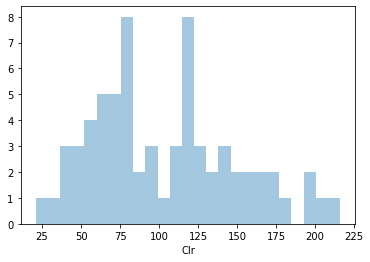

In [17]:
sns.distplot(pt['Clr'], kde=False, bins=25)

In [18]:
tp = (pt['Clr'] >= 70)
pt = pt.loc[tp]
pt

,Player,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,...,Cmp.3,Att.3,Cmp%.3,KP,1/3,PPA,CrsPA,Prog,Clr,PrgDist.1
0,Max Aarons,DF,Norwich City,32.0,1087,1440,75.5,18371,6874.0,560,...,98,217,45.2,19.0,50.0,36.0,8.0,94.0,70,3893.0
3,Kristoffer Ajer,DF,Brentford,22.2,629,873,72.1,11601,5267.0,245,...,74,153,48.4,6.0,48.0,10.0,1.0,75.0,81,2047.0
15,Daniel Amartey,DF,Leicester City,23.6,1353,1475,91.7,27707,7913.0,405,...,186,230,80.9,3.0,55.0,0.0,0.0,59.0,110,2940.0
16,Joachim Andersen,DF,Crystal Palace,32.4,1813,2197,82.5,47245,14431.0,326,...,518,779,66.5,19.0,159.0,12.0,3.0,93.0,156,4315.0
27,César Azpilicueta,DF,Chelsea,23.0,1442,1713,84.2,24337,9312.0,707,...,95,176,54.0,18.0,107.0,20.0,3.0,124.0,71,2994.0
39,Jan Bednarek,DF,Southampton,29.2,1185,1431,82.8,24493,7355.0,395,...,171,295,58.0,6.0,75.0,1.0,1.0,51.0,169,1987.0
70,Matty Cash,DF,Aston Villa,37.5,1120,1586,70.6,20851,8091.0,482,...,139,361,38.5,25.0,68.0,29.0,14.0,91.0,95,3573.0
73,Craig Cathcart,DF,Watford,26.6,742,917,80.9,17605,5044.0,176,...,169,253,66.8,2.0,47.0,5.0,1.0,40.0,129,1007.0
88,Conor Coady,DF,Wolves,37.3,1471,1632,90.1,36772,10454.0,216,...,394,492,80.1,2.0,50.0,4.0,0.0,44.0,150,2904.0
89,Séamus Coleman,DF,Everton,29.5,913,1237,73.8,16388,7499.0,428,...,105,218,48.2,12.0,91.0,25.0,11.0,84.0,75,2319.0


In [19]:
pt = pt.reset_index(drop=True)


In [20]:
pt

,Player,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,...,Cmp.3,Att.3,Cmp%.3,KP,1/3,PPA,CrsPA,Prog,Clr,PrgDist.1
0,Max Aarons,DF,Norwich City,32.0,1087,1440,75.5,18371,6874.0,560,...,98,217,45.2,19.0,50.0,36.0,8.0,94.0,70,3893.0
1,Kristoffer Ajer,DF,Brentford,22.2,629,873,72.1,11601,5267.0,245,...,74,153,48.4,6.0,48.0,10.0,1.0,75.0,81,2047.0
2,Daniel Amartey,DF,Leicester City,23.6,1353,1475,91.7,27707,7913.0,405,...,186,230,80.9,3.0,55.0,0.0,0.0,59.0,110,2940.0
3,Joachim Andersen,DF,Crystal Palace,32.4,1813,2197,82.5,47245,14431.0,326,...,518,779,66.5,19.0,159.0,12.0,3.0,93.0,156,4315.0
4,César Azpilicueta,DF,Chelsea,23.0,1442,1713,84.2,24337,9312.0,707,...,95,176,54.0,18.0,107.0,20.0,3.0,124.0,71,2994.0
5,Jan Bednarek,DF,Southampton,29.2,1185,1431,82.8,24493,7355.0,395,...,171,295,58.0,6.0,75.0,1.0,1.0,51.0,169,1987.0
6,Matty Cash,DF,Aston Villa,37.5,1120,1586,70.6,20851,8091.0,482,...,139,361,38.5,25.0,68.0,29.0,14.0,91.0,95,3573.0
7,Craig Cathcart,DF,Watford,26.6,742,917,80.9,17605,5044.0,176,...,169,253,66.8,2.0,47.0,5.0,1.0,40.0,129,1007.0
8,Conor Coady,DF,Wolves,37.3,1471,1632,90.1,36772,10454.0,216,...,394,492,80.1,2.0,50.0,4.0,0.0,44.0,150,2904.0
9,Séamus Coleman,DF,Everton,29.5,913,1237,73.8,16388,7499.0,428,...,105,218,48.2,12.0,91.0,25.0,11.0,84.0,75,2319.0


C:\Users\omark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Prog'>

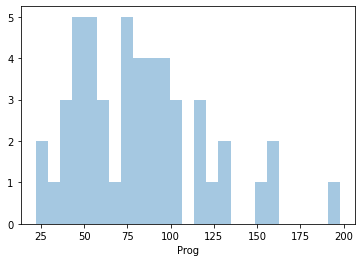

In [21]:
sns.distplot(pt['Prog'], kde=False, bins=25)

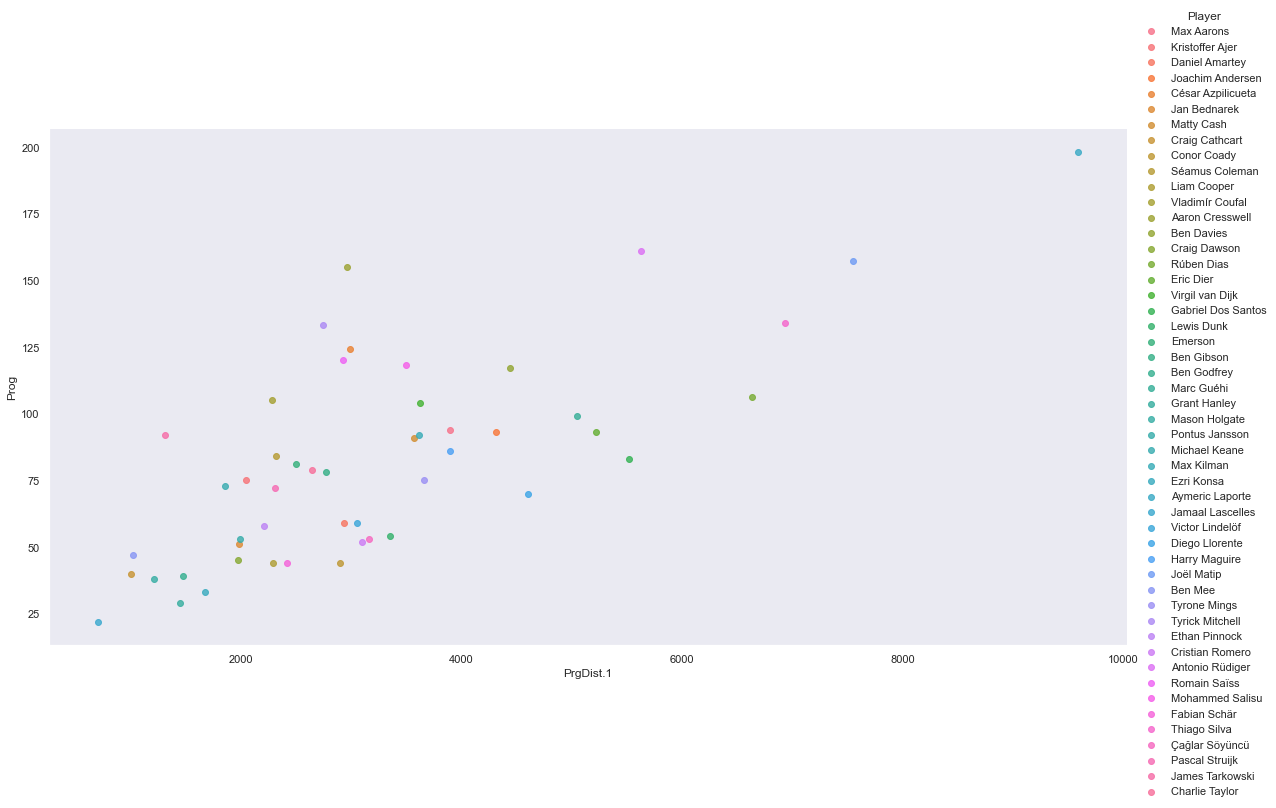

In [22]:
sns.set_theme(font='Rubik')
sns.set_style("dark")
sns.axes_style()
sns.lmplot( x='PrgDist.1', y='Prog',data=pt, hue='Player',
          height=8, aspect=2)

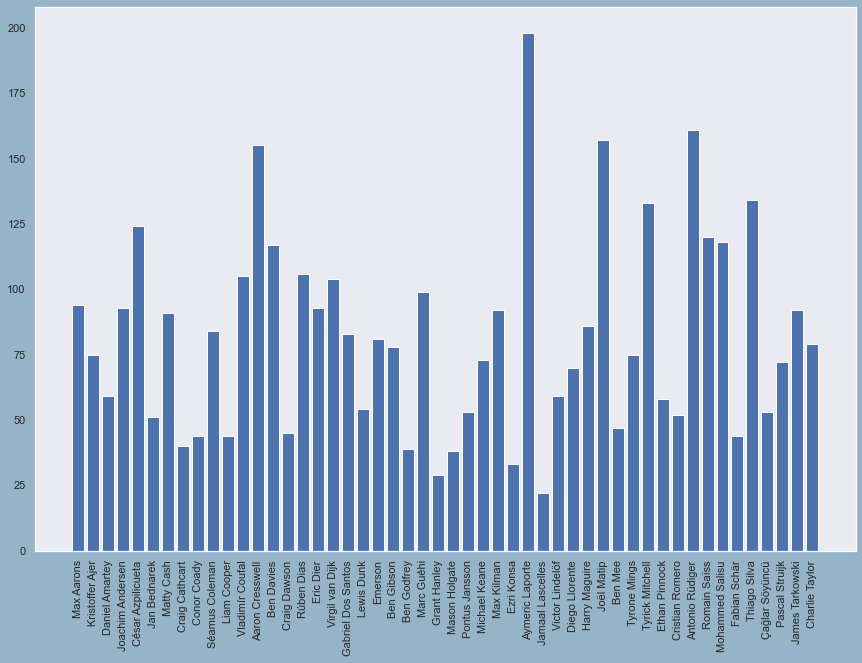

In [24]:
plt.figure(figsize=(50, 10) ,facecolor='#96b4c8')
plt.subplot(131)
ply=pt['Player']
prg=pt['Prog']
plt.bar(ply, prg)


plt.xticks(ply, ply, rotation=90)
plt.show()